# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [3]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

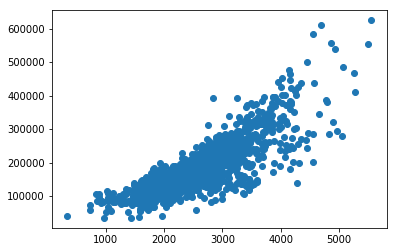

In [4]:
plt.scatter(X,y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
reg.coef_

array([83.79128706])

In [16]:
reg.predict([ [3500] ])

array([259695.552062])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [19]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
pred=reg.predict(X_test)

In [25]:
#y_test

In [32]:
np.mean(np.abs(y_test-pred))

33687.64542462718

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
mean_absolute_error(y_test,pred)

33687.645424627175

In [33]:
np.mean(np.abs(y_test-pred)/y_test)

0.19873480405581537

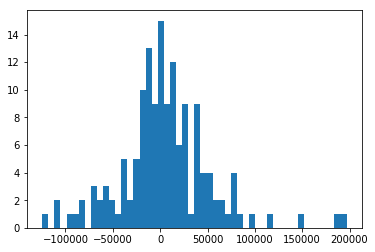

In [36]:
plt.hist(y_test-pred,bins=50);

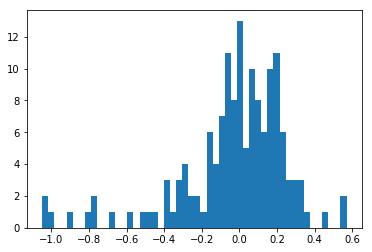

In [37]:
plt.hist((y_test-pred)/y_test,bins=50);

In [38]:
xgrid = [ [i] for i in np.linspace(1000,5000,1000)]

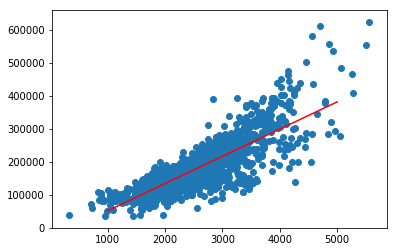

In [43]:
plt.plot(xgrid,reg.predict(xgrid),color="red")
plt.scatter(X,y);

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
regk = KNeighborsRegressor(n_neighbors=4)

In [48]:
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [49]:
mean_absolute_error(y_test,regk.predict(X_test))

35203.75171232877

In [54]:
xt = np.linspace(0,10,100)
yt= sin(xt)

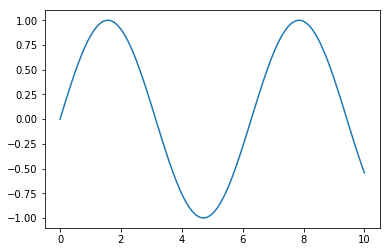

In [55]:
plt.plot(xt,yt)

In [56]:
np.corrcoef(xt,yt)[0][1]

-0.07589466694797185

In [58]:
maes=[]
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

In [61]:
np.mean(y_train)

179885.538579068

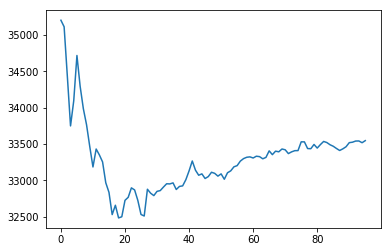

In [59]:
plt.plot(maes)

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
np.sqrt(mean_squared_error(y_test,regk.predict(X_test)))

51580.17455057197

In [64]:
from sklearn.model_selection import cross_val_score

In [66]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [71]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30356.937686139747

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
regk = KNeighborsRegressor(n_neighbors=19)

In [78]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-30450.566467715682

In [79]:
regl = LinearRegression()
cross_val_score(regl,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31053.225860573915

In [76]:
reg_final = LinearRegression()
reg_final.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
from sklearn.model_selection import GridSearchCV

In [87]:
reg = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [88]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [89]:
reg.best_params_

{'n_neighbors': 82}

In [90]:
reg.best_score_

-30197.346752158242

In [91]:
reg_final = reg.best_estimator_

In [92]:
reg_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=82, p=2,
          weights='uniform')

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
regd = DecisionTreeRegressor(max_depth=5)

In [98]:
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-31645.312498536532

In [104]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [105]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [106]:
reg.best_score_

-30439.471232279666

In [107]:
reg.best_params_

{'max_depth': 4, 'min_samples_leaf': 30}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
reg = RandomizedSearchCV(DecisionTreeRegressor(),
                  param_distributions={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  n_iter=5      )

In [111]:
reg.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [112]:
reg.best_score_

-30922.04494041526

In [114]:
reg.best_params_

{'min_samples_leaf': 10, 'max_depth': 3}

In [115]:
# Correlation
def corr_test(y_test,pred):
    return np.corrcoef(y_test,pred)[0][1]

In [116]:
from sklearn.metrics import make_scorer
cross_val_score(regd,X,y,cv=5,scoring=make_scorer(corr_test)).mean()

0.8021220619879843

In [117]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring=make_scorer(corr_test))

In [118]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(corr_test), verbose=0)

In [119]:
reg.best_params_

{'max_depth': 3, 'min_samples_leaf': 10}

In [120]:
from sklearn.tree import export_graphviz

In [121]:
import pydotplus
from string import String

In [126]:
import io
dot_data = io.StringIO()

In [127]:
export_graphviz(reg.best_estimator_, out_file=dot_data,filled=True, rounded=True,
 special_characters=True)

In [129]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

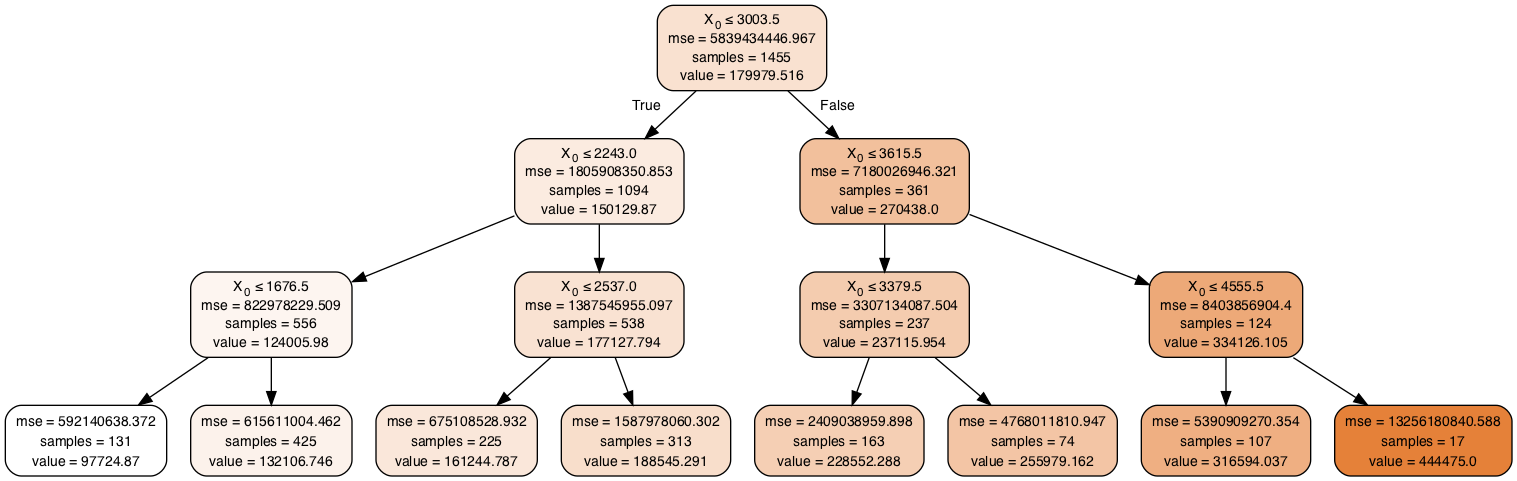

In [133]:
from IPython.display import Image
Image(graph.create_png())

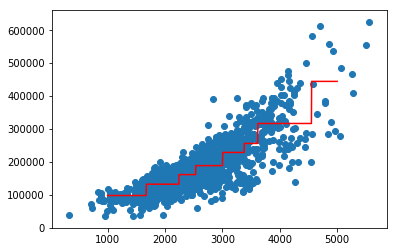

In [134]:
plt.plot(xgrid,reg.best_estimator_.predict(xgrid),color="red")
plt.scatter(X,y);